## Khai báo thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## Đọc và mô tả dữ liệu

In [ ]:
path = 'dataset/Churn_Modelling.csv'

In [3]:
df = pd.read_csv(path)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


- RowNumber: Số thứ tự
- CustomerID: Mã khách hàng
- Surname: Họ khách hàng
- Creditscore: Điểm tín dụng
- Geography: Quốc gia
- Gender: Giới tính
- Age: Tuổi khách hàng
- Tenure: Số năm gắn bó với ngân hàng
- Balance: Số dư tài khoản trung bình
- NumOfProducts: Số lượng sản phẩm/dịch vụ đang sử dụng
- HashCrCard: Có thẻ tính dụng
- IsActiveMember: Thành viên tích cực
- EstimatedSalary: Mức lương ước tính
- Exited: Rời bỏ ngân hàng

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [8]:
df.nunique().sort_values()

Gender                 2
HasCrCard              2
IsActiveMember         2
Exited                 2
Geography              3
NumOfProducts          4
Tenure                11
Age                   70
CreditScore          460
Surname             2932
Balance             6382
EstimatedSalary     9999
RowNumber          10000
CustomerId         10000
dtype: int64

Loại bỏ những feature không cần thiết

In [4]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


## Phân tích dữ liệu

In [9]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

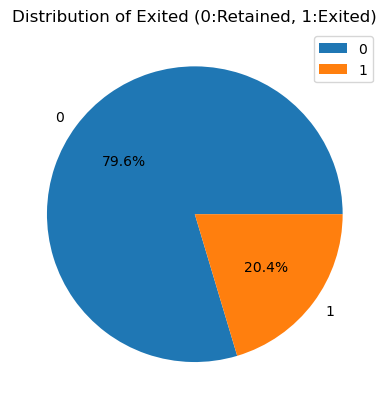

In [11]:
plt.pie(df['Exited'].value_counts(), labels=df['Exited'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Exited (0:Retained, 1:Exited)')
plt.legend()
plt.show()

<Axes: xlabel='IsActiveMember', ylabel='count'>

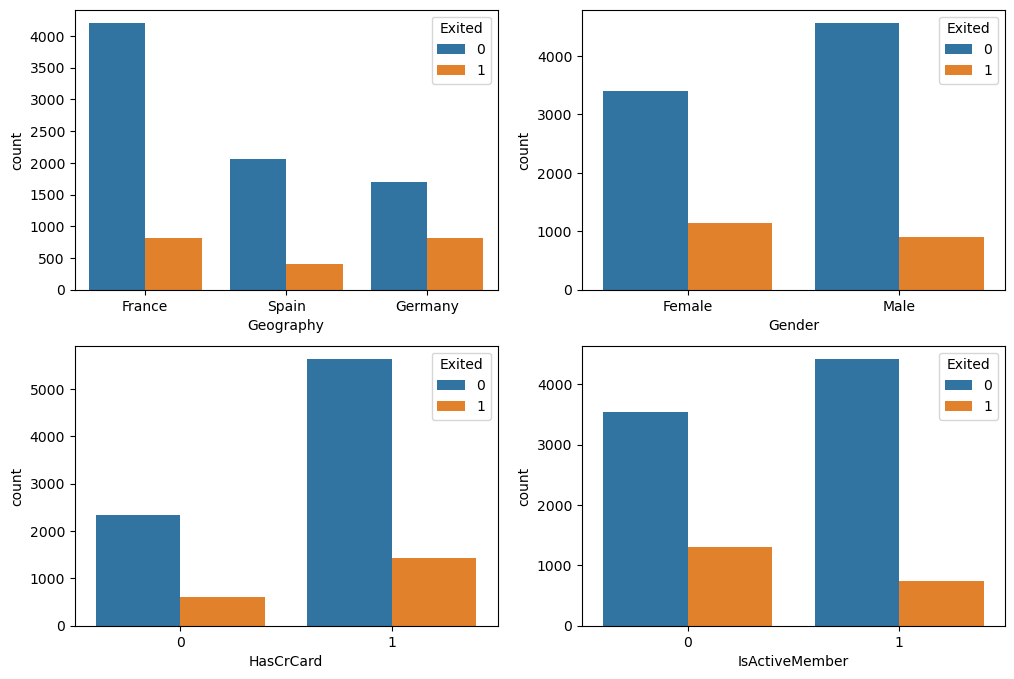

In [12]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))
sns.countplot(x='Geography', hue='Exited', data=df, ax=axarr[0][0])
sns.countplot(x='Gender', hue='Exited', data=df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue='Exited', data=df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue='Exited', data=df, ax=axarr[1][1])

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

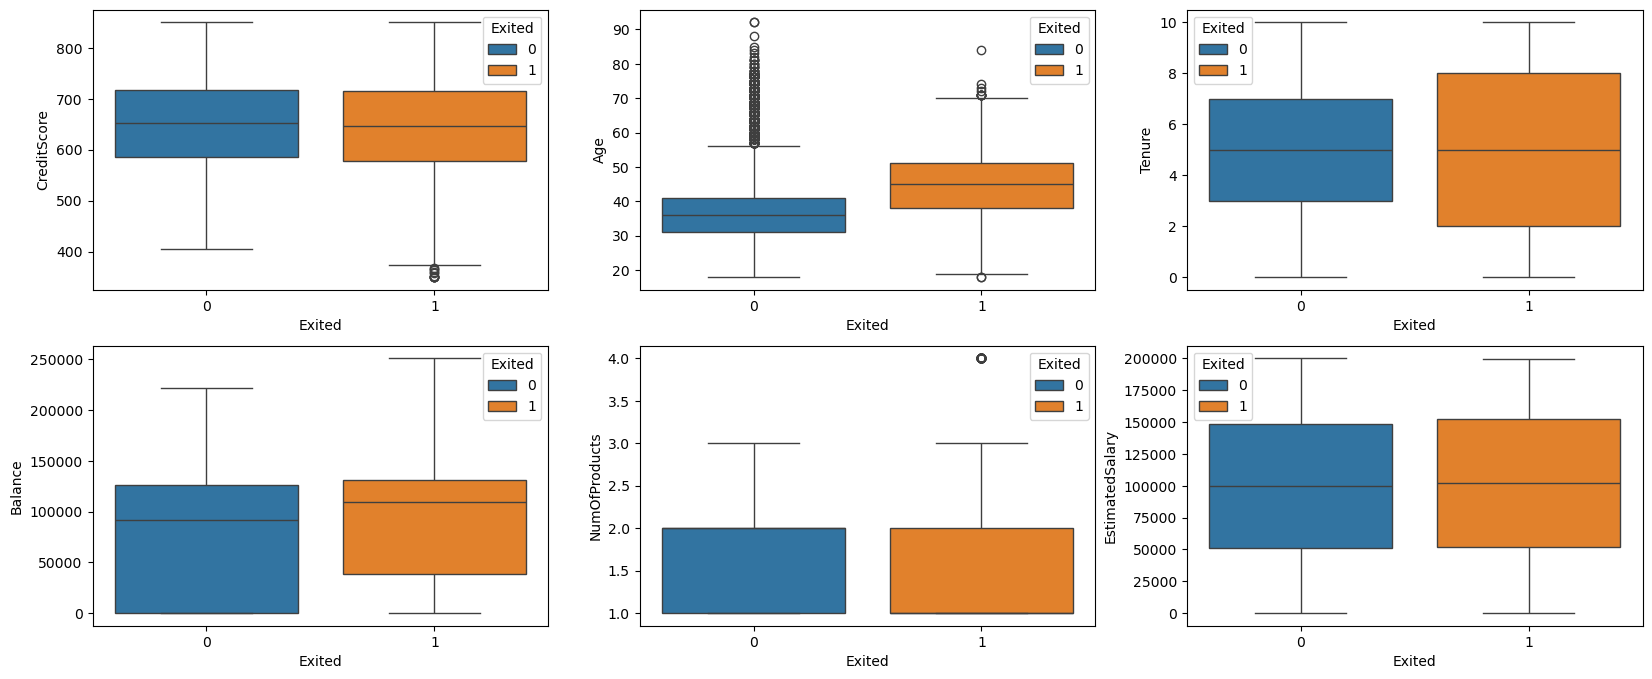

In [13]:
fig, axs = plt.subplots(2, 3, figsize=(20, 8))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axs[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axs[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axs[0][2])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axs[1][0])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axs[1][1])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axs[1][2])

<Axes: >

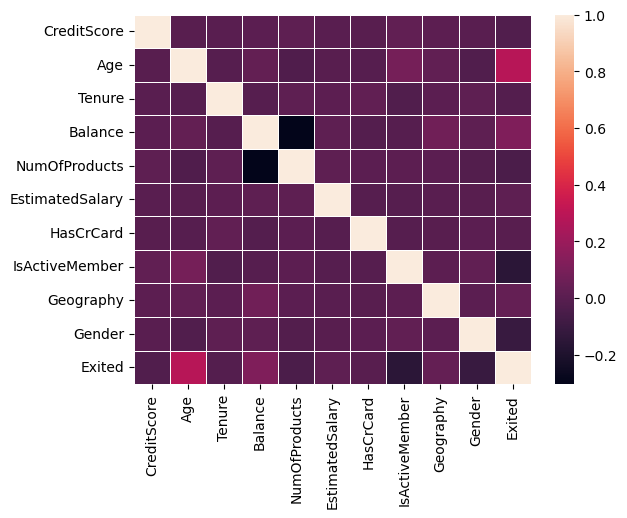

In [16]:
sns.heatmap(df1.corr(), annot=False, linewidths=0.5)

## Tiền xử lý dữ liệu
1. Kiểm tra dữ liệu bị thiếu
2. Chuẩn hoá dữ liệu liên tục
3. Mã hoá dữ liệu dạng chữ
4. Xử lý mất cân bằng dữ liệu

### 1. Kiểm tra dữ liệu bị thiếu

In [14]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### 2. Chuẩn hoá dữ liệu continuous

In [5]:
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts','EstimatedSalary']
scaler = StandardScaler()
df_continuous = pd.DataFrame(scaler.fit_transform(df[continuous_vars]), columns=continuous_vars)
df_continuous.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276


In [41]:
import joblib

scaler_filename = 'scaler.pkl' 
joblib.dump(scaler, scaler_filename)

['scaler.pkl']

### 3. Xử lý dữ liệu categorical

In [6]:
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
for col in cat_vars:
    print(f"The distribution of categorical valeus in the {col} is : ")
    print(df[col].value_counts())
    print("-"*50)

The distribution of categorical valeus in the HasCrCard is : 
HasCrCard
1    7055
0    2945
Name: count, dtype: int64
--------------------------------------------------
The distribution of categorical valeus in the IsActiveMember is : 
IsActiveMember
1    5151
0    4849
Name: count, dtype: int64
--------------------------------------------------
The distribution of categorical valeus in the Geography is : 
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
--------------------------------------------------
The distribution of categorical valeus in the Gender is : 
Gender
Male      5457
Female    4543
Name: count, dtype: int64
--------------------------------------------------


In [7]:
le = LabelEncoder()
df_cat = df[cat_vars].apply(le.fit_transform)
df_cat.head()

,HasCrCard,IsActiveMember,Geography,Gender
0,1,1,0,0
1,0,1,2,0
2,1,0,0,0
3,0,0,0,0
4,1,1,2,0


In [8]:
df1 = pd.concat([df_continuous, df_cat, df['Exited']], axis=1)
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography,Gender,Exited
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886,1,1,0,0,1
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534,0,1,2,0,0
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687,1,0,0,0,1
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918,0,0,0,0,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276,1,1,2,0,0


In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  float64
 1   Age              10000 non-null  float64
 2   Tenure           10000 non-null  float64
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  float64
 5   EstimatedSalary  10000 non-null  float64
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   Geography        10000 non-null  int64  
 9   Gender           10000 non-null  int64  
 10  Exited           10000 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 859.5 KB


### 4. Xử lý dữ liệu mất cân bằng

In [9]:
X = df1.drop('Exited', axis=1)
y = df1['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
print(y_train.value_counts())

Exited
0    6356
1    1644
Name: count, dtype: int64


In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)
print(y_res.value_counts())

Exited
0    6356
1    6356
Name: count, dtype: int64


## Huấn luyện mô hình

### LogisticRegression

Trước khi xử lý mất cân bằng dữ liệu

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.815
Precision: 0.5966386554621849
Recall: 0.1806615776081425
F1 Score: 0.27734375
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



Sau khi xử lý mất cân bằng dữ liệu

In [34]:
lr = LogisticRegression()
lr.fit(X_res, y_res)
y_pred = lr.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.714
Precision: 0.3712230215827338
Recall: 0.6564885496183206
F1 Score: 0.4742647058823529
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.73      0.80      1607
           1       0.37      0.66      0.47       393

    accuracy                           0.71      2000
   macro avg       0.63      0.69      0.64      2000
weighted avg       0.79      0.71      0.74      2000



### Suport Vector Machine

Trước khi xử lý mất cân bằng dữ liệu

In [12]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.858
Precision: 0.8044692737430168
Recall: 0.366412213740458
F1 Score: 0.5034965034965035
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.80      0.37      0.50       393

    accuracy                           0.86      2000
   macro avg       0.83      0.67      0.71      2000
weighted avg       0.85      0.86      0.84      2000



Sau khi xử lý mất cân bằng dữ liệu

In [13]:
svc = SVC(probability=True)
svc.fit(X_res, y_res)
y_pred = svc.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.8005
Precision: 0.494949494949495
Recall: 0.7480916030534351
F1 Score: 0.5957446808510638
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.81      0.87      1607
           1       0.49      0.75      0.60       393

    accuracy                           0.80      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.84      0.80      0.81      2000



### Random Forest

Trước khi xử lý mất cân bằng dữ liệu

In [14]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.8675
Precision: 0.7711864406779662
Recall: 0.4631043256997455
F1 Score: 0.5786963434022258
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



Sau khi xử lý mất cân bằng dữ liệu

In [36]:
rf = RandomForestClassifier()
rf.fit(X_res, y_res)
y_pred = rf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.844
Precision: 0.6025316455696202
Recall: 0.6055979643765903
F1 Score: 0.6040609137055838
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1607
           1       0.60      0.61      0.60       393

    accuracy                           0.84      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000



In [ ]:
plt.figure(figsize=(20,15))
importance = rf.feature_importances_
idxs = np.argsort(importance)
plt.title("Feature Importance")
plt.barh(range(len(idxs)),importance[idxs],align="center")
plt.yticks(range(len(idxs)),[X.columns[i] for i in idxs])
plt.xlabel("Random Forest Feature Importance")
plt.show()

[0.11089044 0.27922795 0.09334022 0.12749683 0.12431285 0.11476177
 0.01666791 0.06215764 0.04065244 0.03049194]


### Lưu mô hình

In [37]:
import pickle
with open('svm.pkl','wb') as f:
    pickle.dump(svc, f)